<a href="https://colab.research.google.com/github/Shourya306/Supervised-Machine-Learning-Classification/blob/main/Cardiovascular_Risk_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>

## <b>Data Description </b>
### <b>Demographic:</b>
* ### Sex: male or female("M" or "F")
* ### Age: Age of the patient

### <b>Behavioral:</b>
* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* ###  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.

### <b>Medical( history):</b>
* ###  BP Meds: whether or not the patient was on blood pressure medication 
* ###  Prevalent Stroke: whether or not the patient had previously had a stroke 
* ###  Prevalent Hyp: whether or not the patient was hypertensive
* ###  Diabetes: whether or not the patient had diabetes 

### <b>Medical( current):</b>
* ###  Tot Chol: total cholesterol level 
* ###  Sys BP: systolic blood pressure 
* ###  Dia BP: diastolic blood pressure
* ###  BMI: Body Mass Index
* ###  Heart Rate: heart rate
* ###  Glucose: glucose level

### <b>Predict variable (desired target):</b>
* ###  10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
# Importing the pre-requisite libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # Code to not show me any warnings that might arise

pd.set_option('max_columns',None)  # Code to make sure pandas shows me all the columns.

In [2]:
# Importing the dataset.

cardio_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cardiovascular Risk Prediction - Challa Shourya Chandra Sai./data_cardiovascular_risk.csv')

In [3]:
# Inspecting the dataset.

cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [5]:
# Checking out the datatype of all the columns.

cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
# Understanding the basic stats.

cardio_df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


## **Defining The Problem Statement.**

*Understanding the difference between numeric[continuous variables and discrete variables] & categorical variables.*

**Continous variables** - These are those variables whose values are obtained by measuring. They can assume any value between an interval.

**Discrete variables** - These are those variables whose values are obtained by counting. They can assume distinct set of values.

**Categorical variables** - These are those variables whose values are of string datatype or binary in nature and they assume distinct set of values.

*Why Choose Classification to model the data?*

Classification is used to model the data because we want to predict the **dependent variable(y)** which is categorical in nature.

*Segregating the variables into **dependent & independent** variables[categorical or continous/Discrite.].*

Dependent Variable(Y): TenYearCHD is categorical in nature with 2 classes 0 & 1.

Independent Variables(X's):

* Sex = It is categorical in nature with 2 classes Male & Female.

* Age = It is continuous in nature.

* Education = It is categorical in nature with 4 classes 1, 2, 3, & 4. 

* is_smoking = It is categorical in nature with 2 classes 1 & 0.

* Cigs Per Day: It is continuous in nature as one can consume any number of cigs.

* BP Meds: It is categorical in nature with 2 classes 1 & 0.

* Prevalent Stroke: It is categorical in nature with 2 classes 1 & 0.

* Prevalent Hyp: It is categorical in nature with 2 classes 1 & 0.

* Diabetes: It is categorical in nature with 2 classes 1 & 0.

* Tot Chol: It is continuous in nature.

* Sys BP: It is continuous in nature.

* Dia BP: It is continuous in nature.

* BMI: It is continuous in nature.

* Heart Rate: It is continuous in nature.

* Glucose: It is continuous in nature.

## **Data Preprocessing**

In this section, I will be treating the null values, outliers, and dublicated rows.

In [7]:
# Checking for dublicate rows.

duplicate_check = cardio_df[cardio_df.duplicated()]
print(f'The number of dublicate rows are {len(duplicate_check)}')

The number of dublicate rows are 0


In [8]:
# Checking the missing values and their percentage of missing values.

missing = cardio_df.columns[cardio_df.isnull().any()].tolist()
print('Missing Data Count')
print(cardio_df[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(cardio_df[missing].isnull().sum().sort_values(ascending = False)/len(cardio_df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


Dealing with null values of continuous columns[glucose, totChol, cigsperday, BMI, heartrate] = I will replace the null values for these columns with there respective median because these columns have outliers. As we all know that mean is sensitive to outliers.

Dealing with null values of categorical columns[education, BPMeds] = I will replace the null values with mode.

In [9]:
# Inputing the missing values of continuous columns.

conti_missing_values_columns = ['glucose','totChol','cigsPerDay','BMI','heartRate']

for col in conti_missing_values_columns:
  cardio_df[col].fillna(cardio_df[col].median(), inplace = True)

In [10]:
# Imputing the missing values of categorical columns.

cardio_df = cardio_df.fillna(cardio_df['education'].value_counts().index[0])
cardio_df = cardio_df.fillna(cardio_df['BPMeds'].value_counts().index[0])

In [11]:
# Checking out if we have imputed all the null values.

cardio_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
# Dropping the id column from the dataset.

cardio_df.drop('id', axis = 1, inplace = True)

In [13]:
num_var = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose']

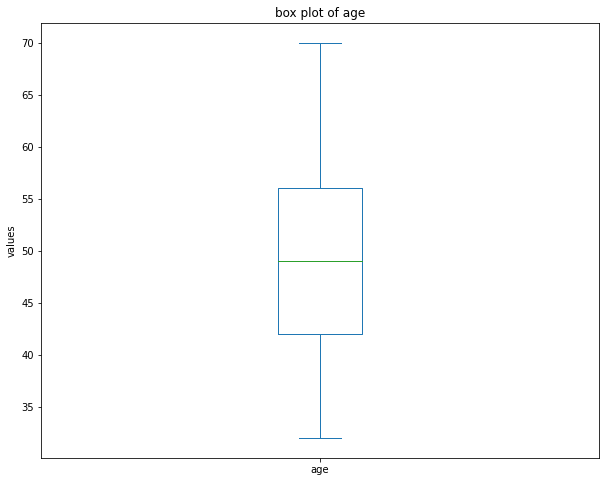

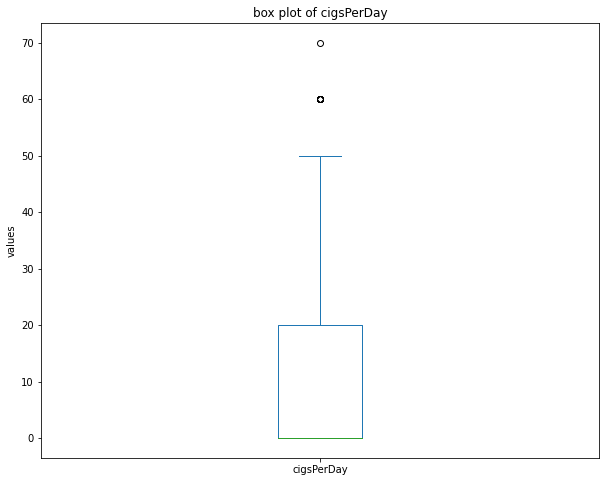

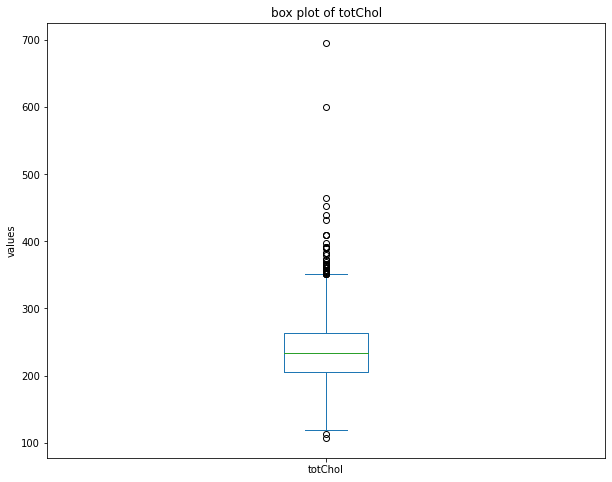

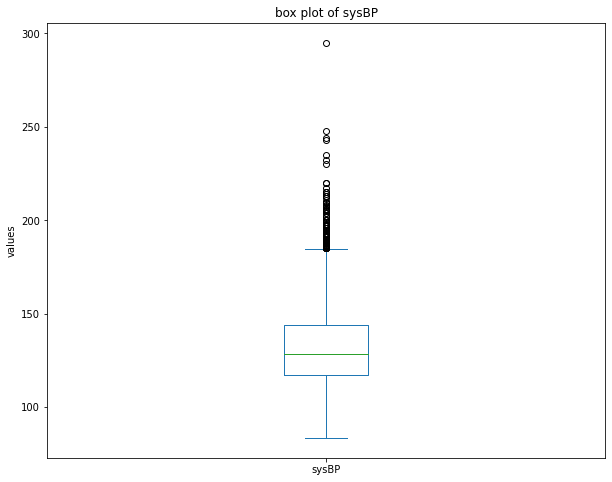

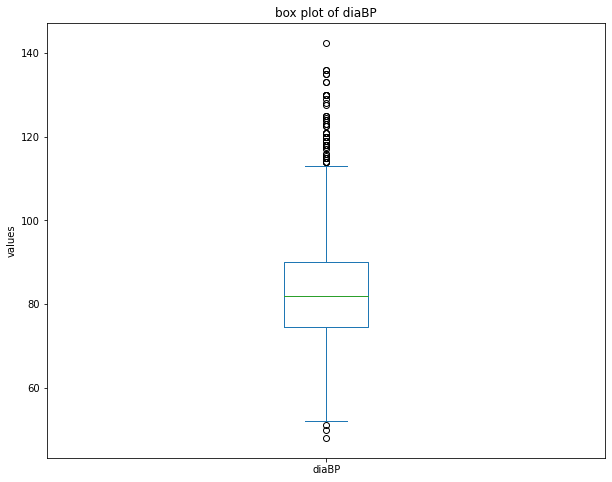

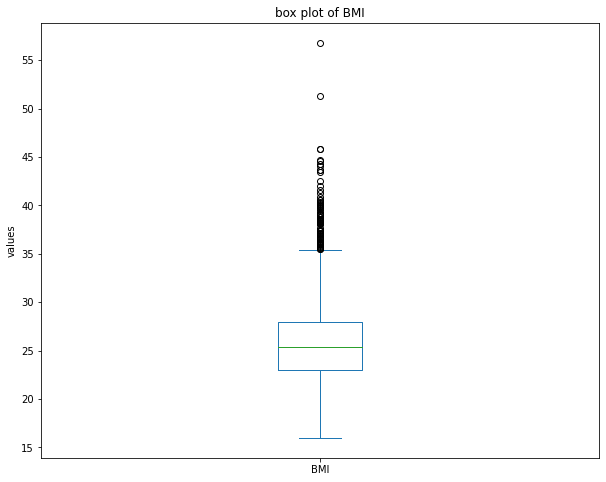

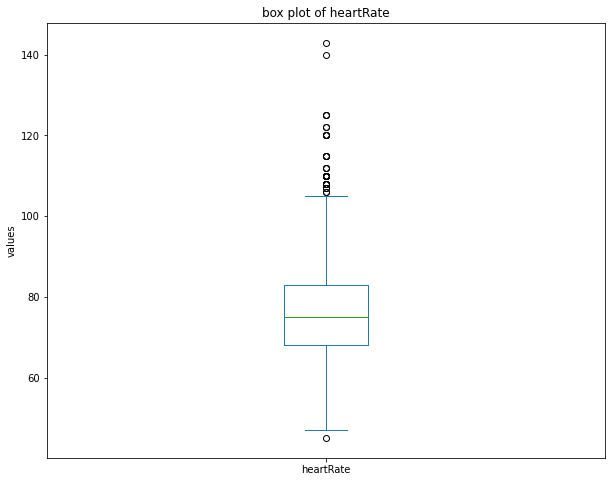

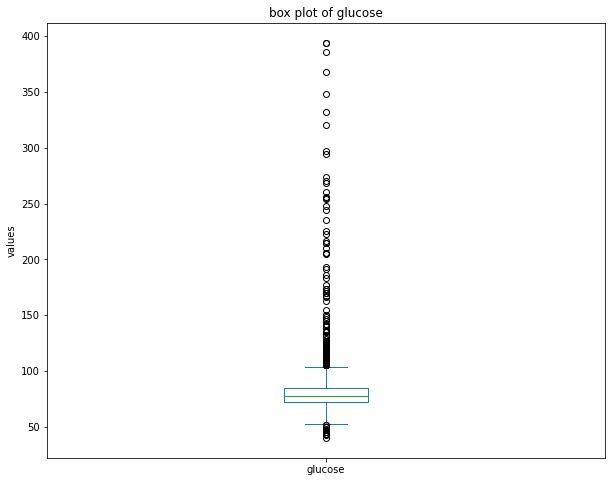

In [14]:
# Visualizing the outliers using boxplots.

for col in num_var:
  plt.figure(figsize = (10,8))
  plt.gca()
  cardio_df[col].plot(kind = 'box')
  plt.ylabel('values')
  plt.title(f'box plot of {col}')

From the box plots we can see that all columns except age have outliers. We will be removing these outliers now.

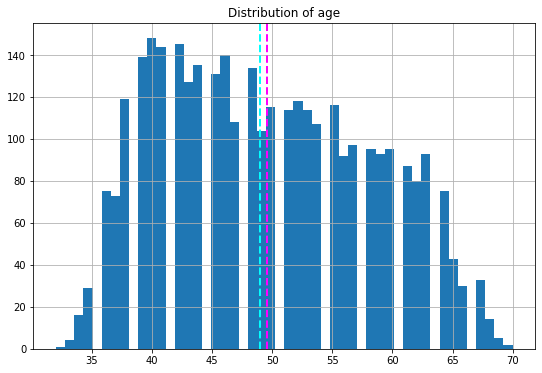

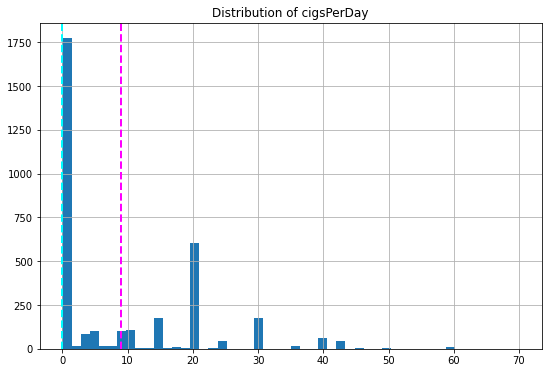

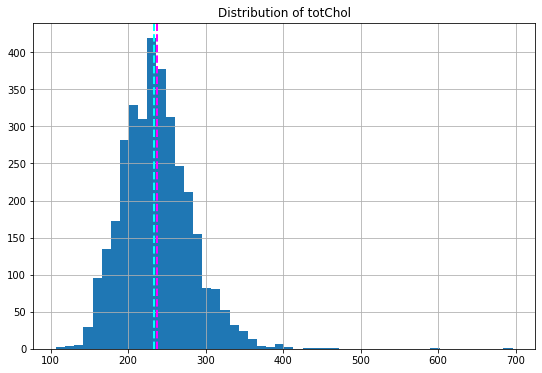

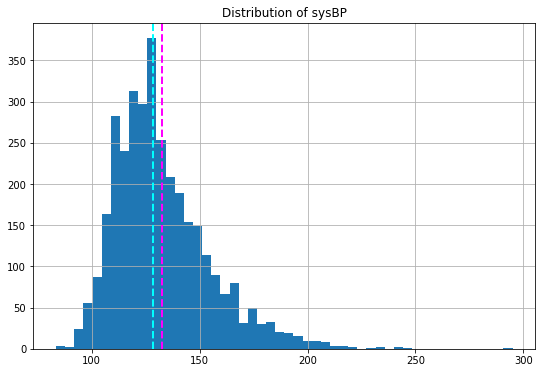

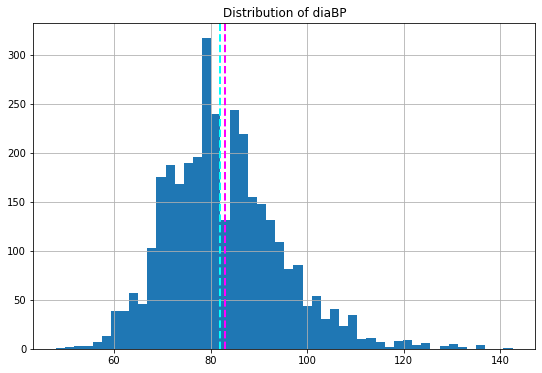

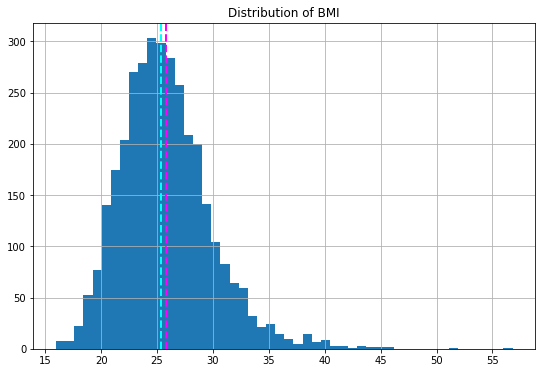

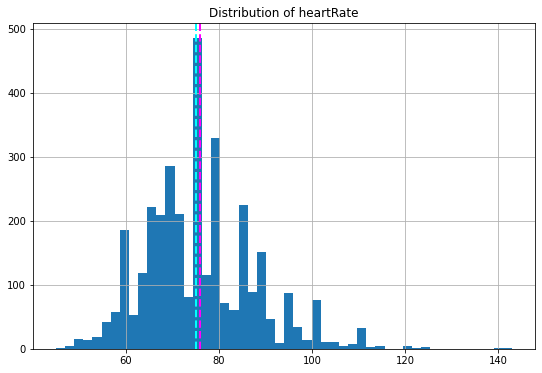

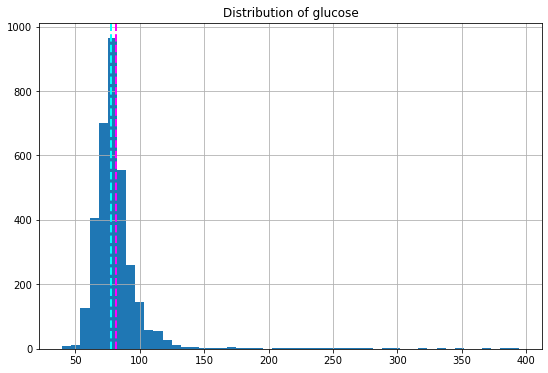

In [15]:
# Visualizing the distribution of the columns that have outliers.

for col in num_var:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = cardio_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title('Distribution of '+ col)
plt.show()

In [16]:
# Creating a copy of this dataset.

no_outliers_df = cardio_df.copy()  

I have created a copy of this dataset because other models like KNN & Random forrest are robust to outliers so I don't need to remove outliers from the dataset like I have done below. While implementing KNN and Random forrest I will use the cardio_df dataset.

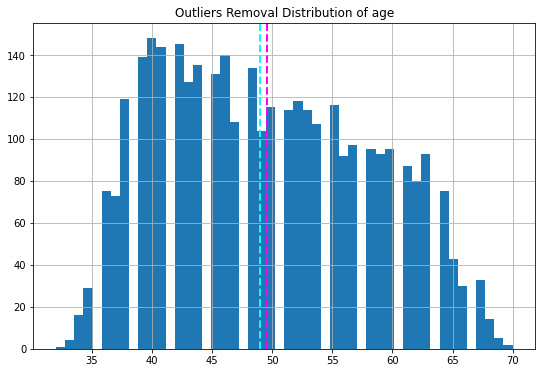

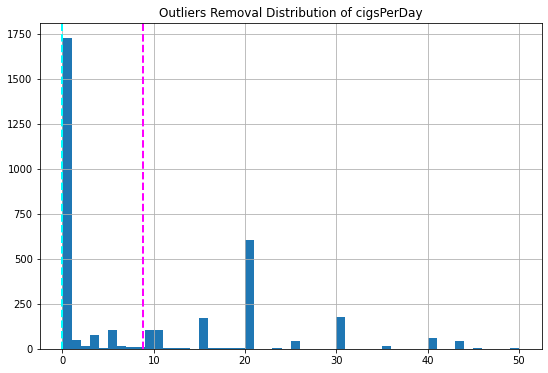

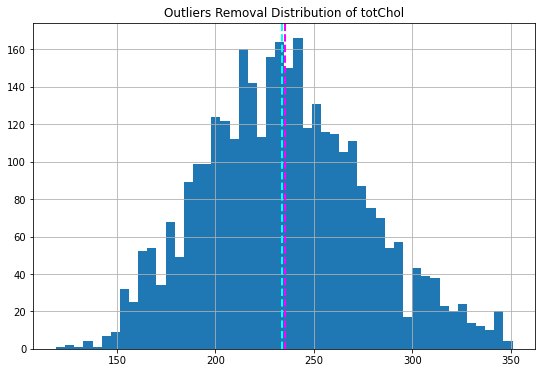

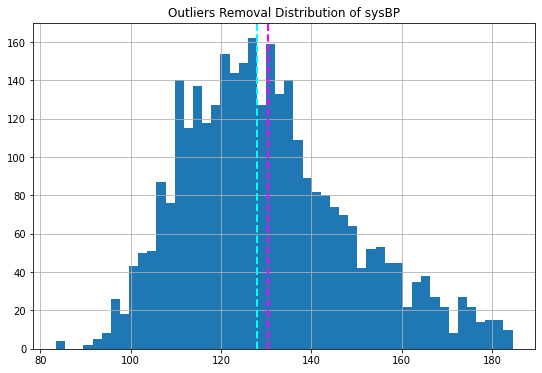

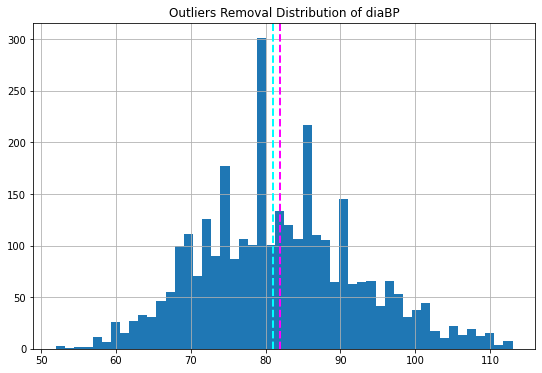

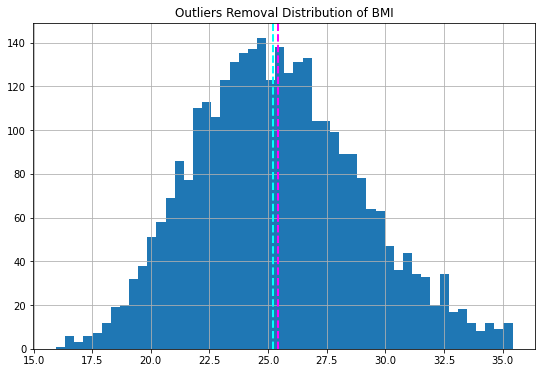

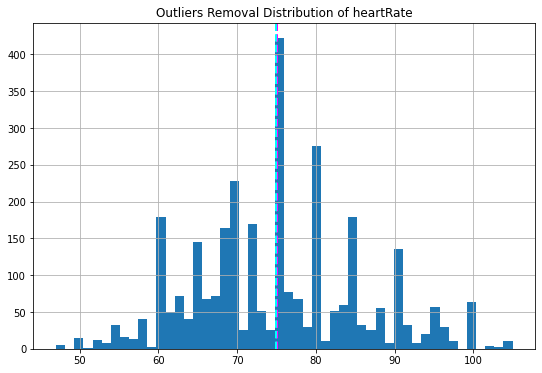

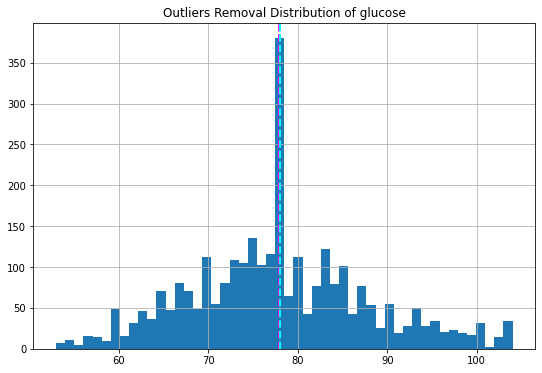

In [17]:
# Removing the outliers from these columns.
 
for col in num_var:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()

  Q1 = np.percentile(cardio_df[col],25)
  Q3 = np.percentile(cardio_df[col],75)
  IQR = Q3 - Q1
  Lower_outliers = Q1 - 1.5*IQR
  Upper_outliers = Q3 + 1.5*IQR     # Calculating the lower outliers and upperoutliers

  no_outliers_df = no_outliers_df[(no_outliers_df[col] >= Lower_outliers) & (no_outliers_df[col] <= Upper_outliers)]
  feature = no_outliers_df[col]            # Subsetting the data without any outliers in an iterative way.

  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title('Outliers Removal Distribution of '+ col)
plt.show()

As you can see from the above distributions after removing the outliers they have become approximately normally distributed.

## **EDA**

Under EDA, I will be performing univariante analysis, and bivarinate analysis.

Univariante analysis = Helps us understand the distribution of a particular column. The most common way to understand the distribution is to plot a histogram.

Multivarinate analysis = Helps us understand the relationship between the dependent variable and independent variables.

###Uni-varinate Analysis

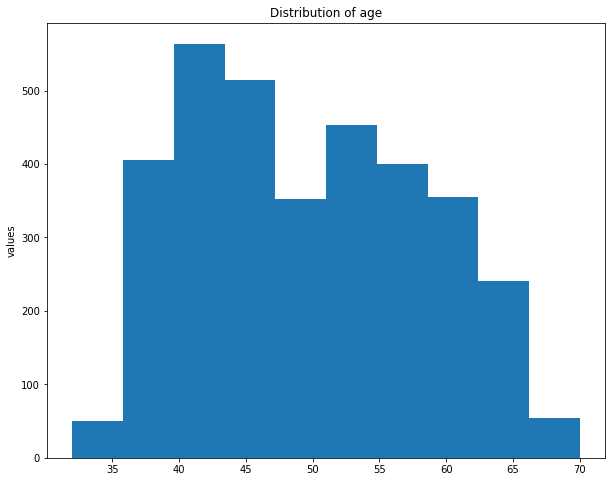

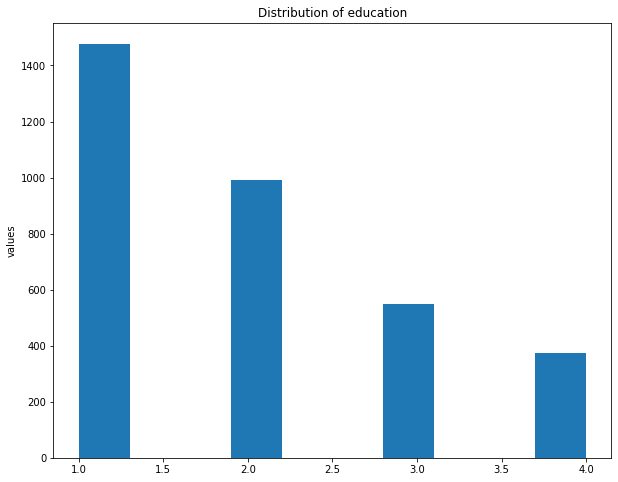

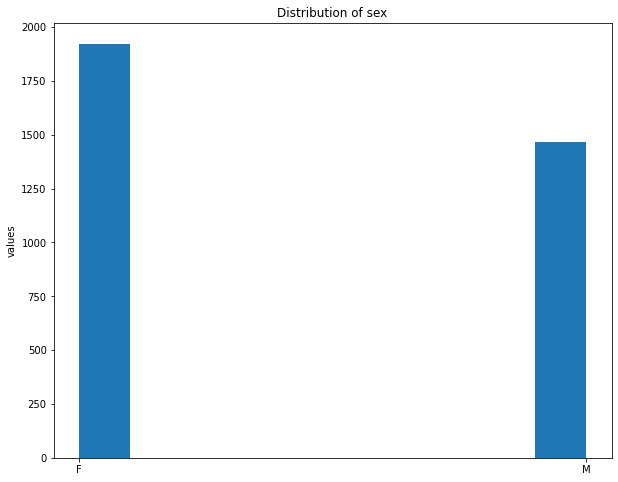

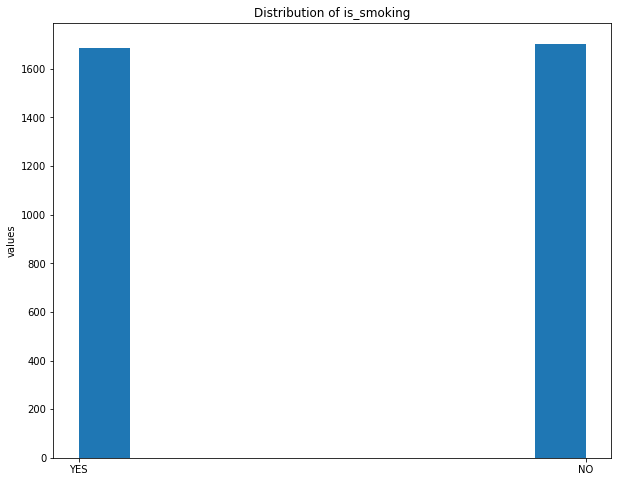

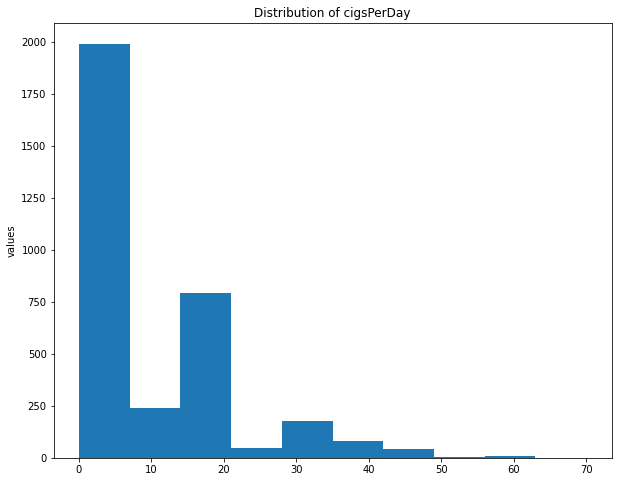

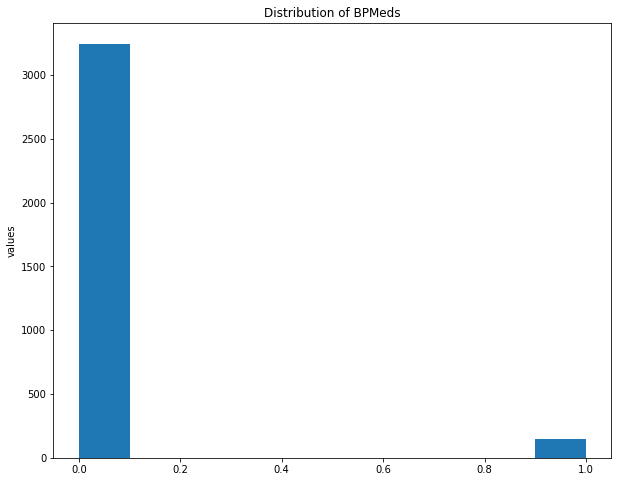

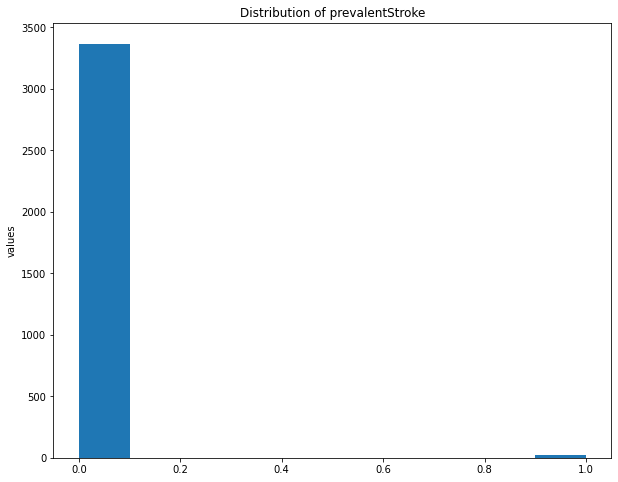

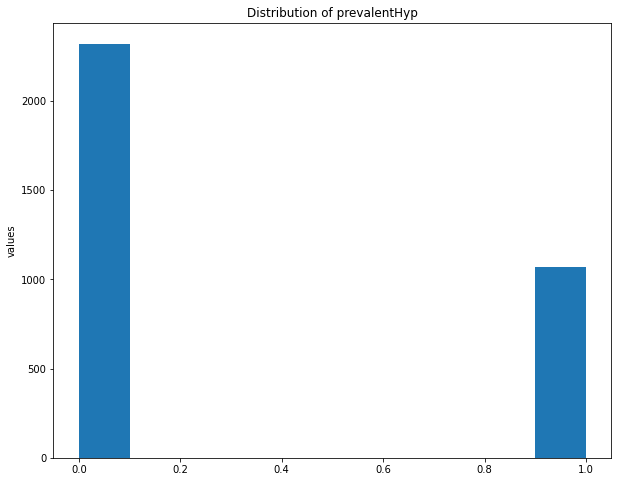

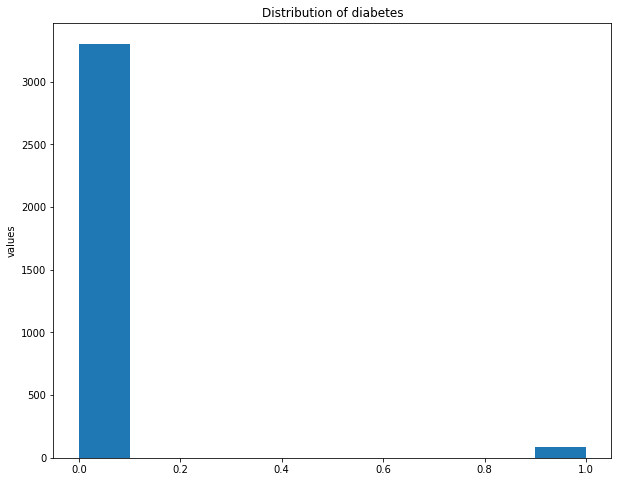

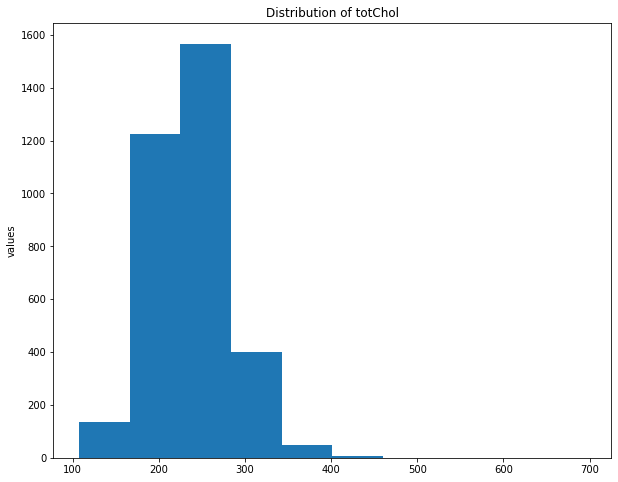

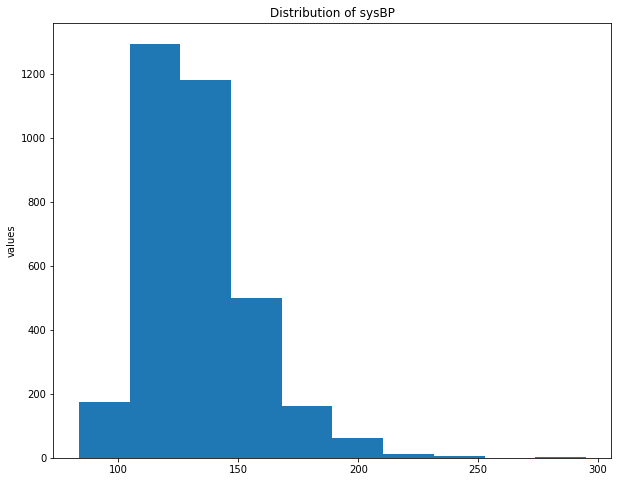

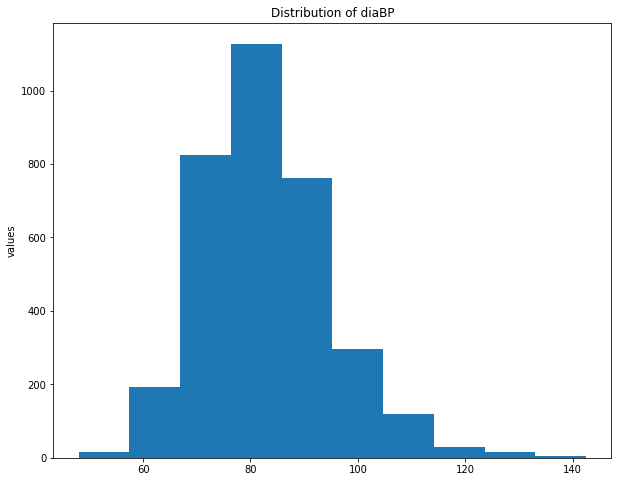

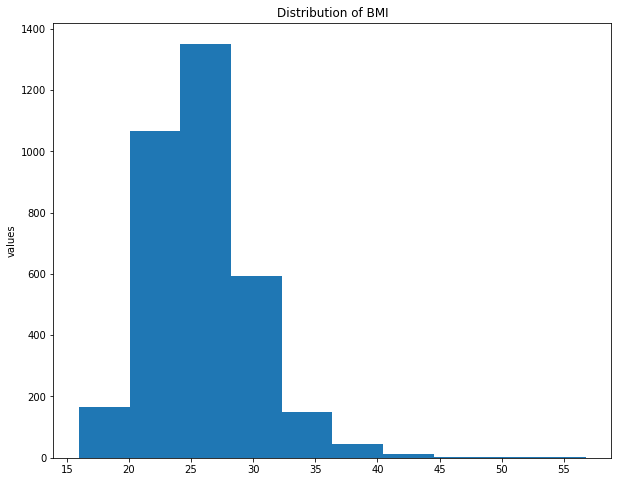

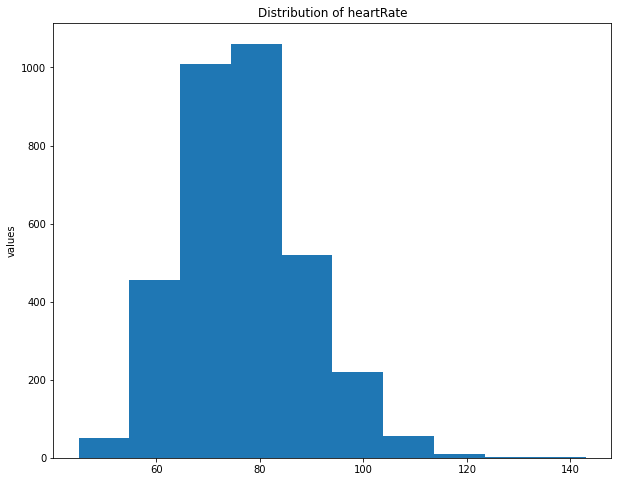

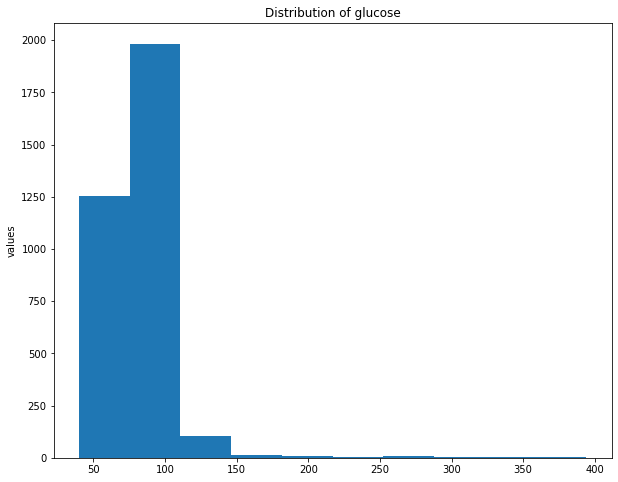

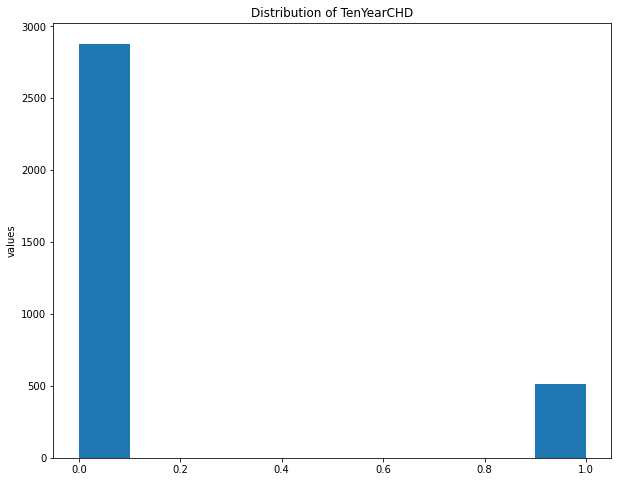

In [18]:
# Uni-varinate analysis through histogram.

for col in no_outliers_df.columns:
  plt.figure(figsize = (10,8))
  plt.hist(cardio_df[col])
  plt.gca()
  plt.title('Distribution of {}'.format(col))
  plt.ylabel('values')

### Bi-variante Analysis.

**Hypothesis:** Those people who smoke a lot of cigarettes they are more prone to TenYearCHD.

Text(0.5, 1.0, 'box plot of TenYearCHD & Cigsperday')

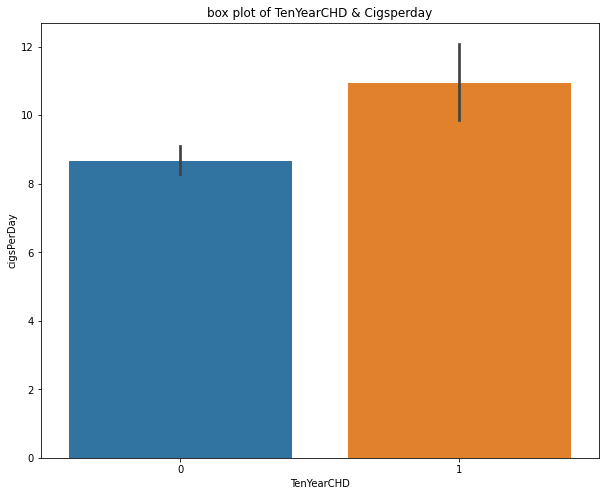

In [19]:
# Understanding the relationship between target variable and cigsperday.
plt.figure(figsize = (10,8))
sns.barplot(y = cardio_df['cigsPerDay'], x = cardio_df['TenYearCHD'])
plt.title('box plot of TenYearCHD & Cigsperday')

**Analysis:** Yaay!, My hypothesis is indeed true.
_________________________________________________________

**Hypothesis:** I don't think there would be any sort of relationship between sex and CHD.

Text(0.5, 1.0, 'stripplot of TenYearCHD & sex')

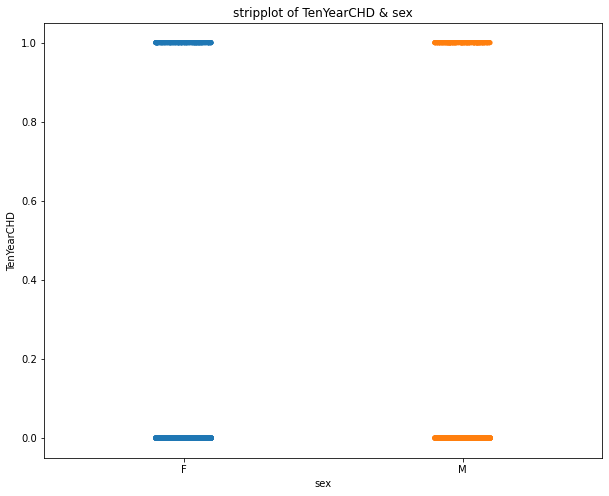

In [20]:
# Understanding the relationship between target variable and sex.
plt.figure(figsize = (10,8))
sns.stripplot(x = cardio_df['sex'], y = cardio_df['TenYearCHD'])
plt.title('stripplot of TenYearCHD & sex')

**Analysis:** My hypothesis is correct, I don't find any relationship between sex and CHD. A male or a female can be suffering from CHD.

__________________________________________________________________

**Hypothesis:** The ideal BMI is between 18.5 and 24.9. So any person above 24.9 is more prone to CHD.

Text(0.5, 1.0, 'lineplot of TenYearCHD & BMI')

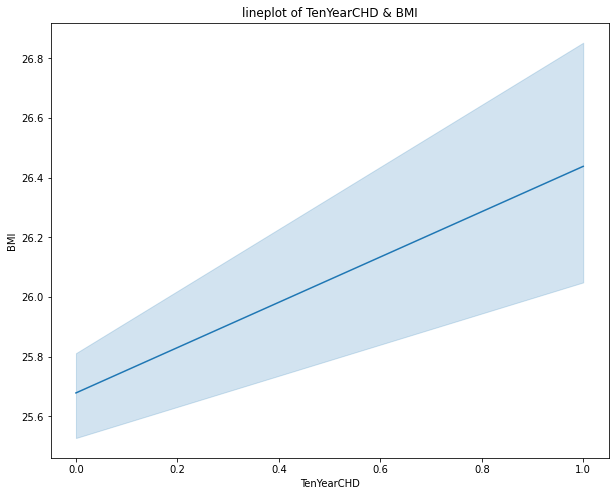

In [21]:
# Understanding the relationship between target variable and BMI.
plt.figure(figsize = (10,8))
sns.lineplot(x = cardio_df['TenYearCHD'], y = cardio_df['BMI'])
plt.title('lineplot of TenYearCHD & BMI')

**Analysis:** As you can see there is the positive relationship between CHD and BMI. The higher the BMI, more prone to CHD and vice-versa.
___________________________________________________________________

**Hypothesis:** I think those how have high glucose may suffer from CHD.

Text(0.5, 1.0, 'boxplot of TenYearCHD & glucose')

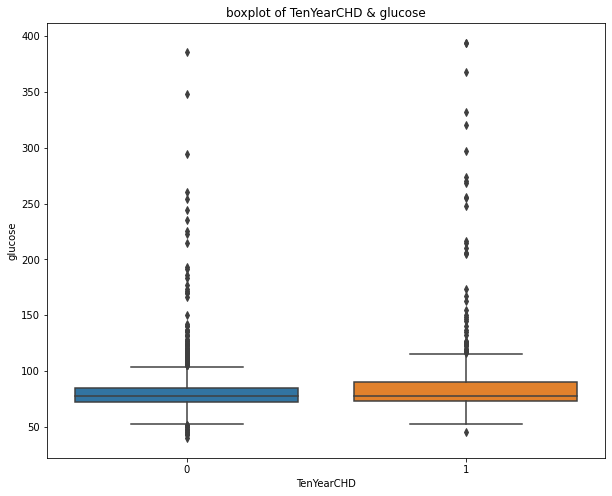

In [22]:
# Understanding the relationship between target variable and glucose.

plt.figure(figsize = (10,8))
sns.boxplot(x = cardio_df['TenYearCHD'], y = cardio_df['glucose'], data = cardio_df)
plt.title('boxplot of TenYearCHD & glucose')

**Analysis:** The relationship is not that explicit. But we can see that the median glucose level of CHD patients is higher than those of no CHD patients.
__________________________________________________________________

## **Model 1: Logistic Regression**



### Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category.

### **Logistic regression** is an excellent tool to know for classification problems, which are problems where the output value that we wish to predict only takes on only a small number of discrete values. Here we'll focus on the binary classification problem, where the output can take on only two distinct classes.

### In **Logistic Regression**, the log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

### \begin{align*}
    \log \left({p\over 1-p}\right) &= w_0 + w_1x_1, ..., w_jx_j \nonumber \\
    &= w^Tx \nonumber
\end{align*}

### where:

- ### $w_{0}$ is the intercept term, and $w_1$ to $w_j$ represents the parameters for all the other features (a total of j features).
- ### By convention of we can assume that $x_0 = 1$, so that we can re-write the whole thing using the matrix notation $w^Tx$.

### This is called the **logit function**. The equation can be re-arranged into the **logistic function**:

### $$p = \frac{e^{w^Tx}} {1 + e^{w^Tx}}$$

### Or in the more commonly seen form:

### $$h_w(x) = \frac{1}{ 1 + e^{-w^Tx} }$$ 



**Assumptions of logistic regression:**

* Binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

* Logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

* Logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### **Encoding categorical variables**

In [23]:
# Encoding the categorical variables.

no_outliers_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**Objective** - The objective is to encode the categorical variables so that the model can read the data in.

Categorical Variables are classified into 3 types:

* Dichotomous variables = These are those categorical variables which have only **2 classes** of categories. We can perfom binary encoding for these kind of variables.

* Ordinal Variables = These are those categorical variables which have **more than 2 classes** of categories and they signify **some order**. We can perform label encoding.

* Nominal Variables = These are those categorical variables which have **more than 2 classes** of categories and they do not signify **any order**. We can perform One hot encoding.

From the above dataframe we can see that only is_smoking column and sex column has to be encoded. I will be performing a binary encoding on these columns. 

In [24]:
binary_encoding = {'sex':{'M':1, 'F':0}, 'is_smoking':{'YES':1,'NO':0}}
no_outliers_df = no_outliers_df.replace(binary_encoding)

In [25]:
no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2922 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2922 non-null   int64  
 1   education        2922 non-null   float64
 2   sex              2922 non-null   int64  
 3   is_smoking       2922 non-null   int64  
 4   cigsPerDay       2922 non-null   float64
 5   BPMeds           2922 non-null   float64
 6   prevalentStroke  2922 non-null   int64  
 7   prevalentHyp     2922 non-null   int64  
 8   diabetes         2922 non-null   int64  
 9   totChol          2922 non-null   float64
 10  sysBP            2922 non-null   float64
 11  diaBP            2922 non-null   float64
 12  BMI              2922 non-null   float64
 13  heartRate        2922 non-null   float64
 14  glucose          2922 non-null   float64
 15  TenYearCHD       2922 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 388.1 KB


### **Multicollinearty**

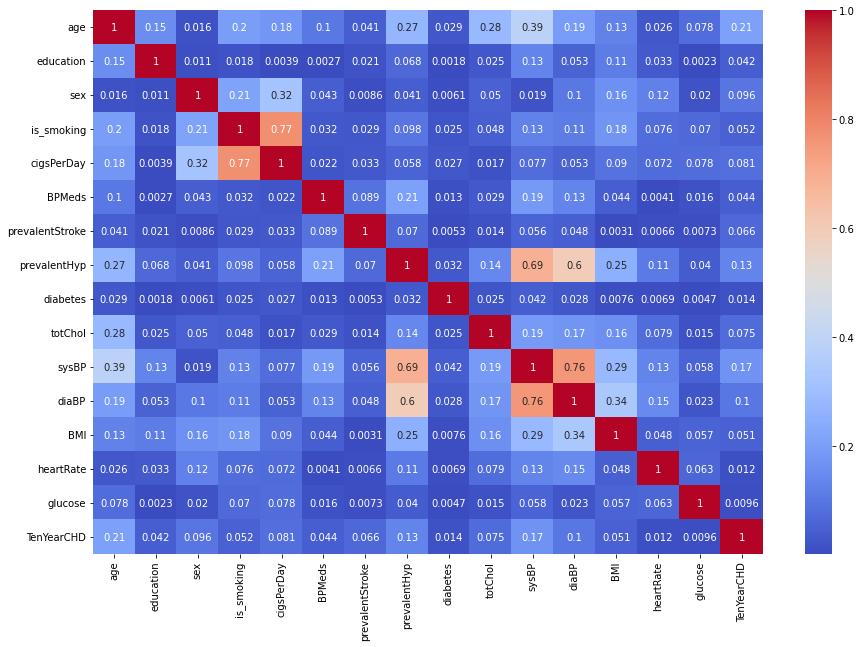

In [26]:
# Checking the correlation between variables.

corr = no_outliers_df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(abs(corr), cmap = 'coolwarm', annot= True)

From the correlation we can see that no one variable is strongly correlated with the dependent variable.

In [27]:
# Defining a function to calculate Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

**Objective** - Our objective hear is to make sure that the VIF of all the columns above is below 5. If the VIF of all the columns are below 5, then we can safely assume that there is no multicollinearity between the independent variables.

**Approach used to reduce the VIF**- We will check what other variable has a VIF value of the same range.

We will check both the variables corrrelation to confrim our finding that they indeed are correlated and remove the feature that has the lowest correlation with dependent variable(**Rented Bike Count**)

In [28]:
# Calculating the VIF score for the independent variables.

independent_variables = [i for i in no_outliers_df.columns if i not in ['TenYearCHD']]
calc_vif(no_outliers_df[independent_variables])

,variables,VIF
0,sysBP,168.329225
1,diaBP,153.032735
2,BMI,59.499234
3,glucose,53.056226
4,heartRate,47.753542
5,age,43.938607
6,totChol,37.874808
7,is_smoking,5.148153
8,education,4.734795
9,cigsPerDay,4.366988


In [29]:
independent_variables = [i for i in no_outliers_df.columns if i not in ['TenYearCHD','sysBP','diaBP','glucose',
                                                            'BMI','totChol','heartRate','is_smoking']]
calc_vif(no_outliers_df[independent_variables])

,variables,VIF
0,age,5.275794
1,education,4.034014
2,sex,2.011139
3,cigsPerDay,1.756689
4,prevalentHyp,1.521079
5,BPMeds,1.092781
6,prevalentStroke,1.018130
7,diabetes,1.007193


After following the above specified approach, we can see that all the variables VIF values are below 5 or close to 5. So we can conclude that there is no multicollinearty among the independent variables.

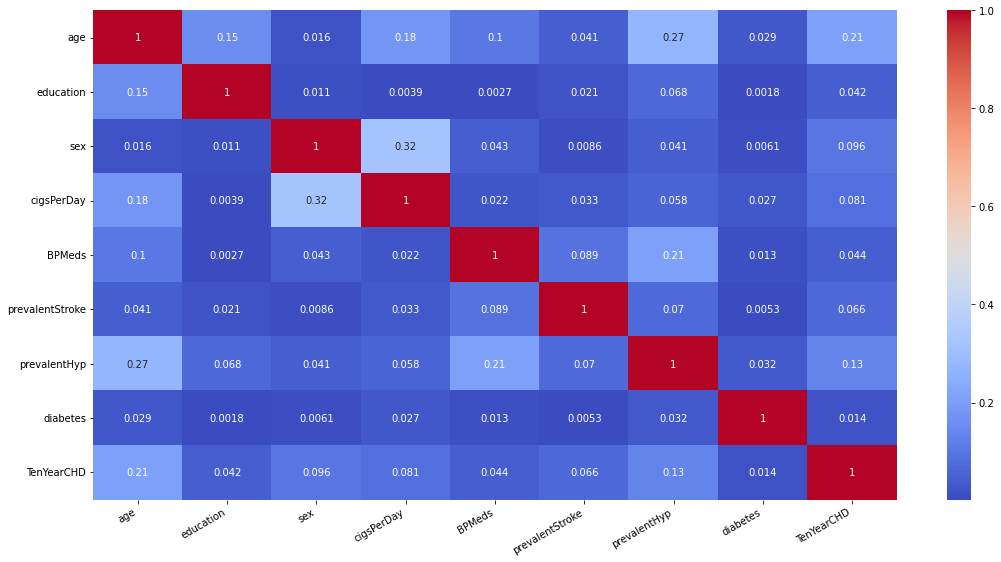

In [34]:
# Updating the dataset
no_outliers_df = no_outliers_df[independent_variables + ['TenYearCHD']]

#checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(no_outliers_df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

### **Dealing with Imbalanced Dataset.**

*Meaning of an Imbalanced dataset:* When the classes of the dependent variable are not equally distributed then we say that the dataset is imbalanced. 

*Why is Imbalance dataset bad?*

Imbalance Dataset is not good because the model might predict skewed results towards the majority class.

*Approach that I will be using to solve this problem:* Since the number of observations is small I can't choose undersampling techniques. From oversamppling techniques I have decided to go for SMOTE(Synthetic Minority Oversampling Techinque).

*What is SMOTE?*

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

In [37]:
# The dataset is an imbalanced.

majority_class = no_outliers_df['TenYearCHD'].value_counts()[0]
minority_class = no_outliers_df['TenYearCHD'].value_counts()[1]

print(f'The majority class has {majority_class} & the minority class has {minority_class} observations')

The majority class has 2532 & the minority class has 390 observations


In [39]:
# Importing and Implementing SMOTE.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0, k_neighbors = 5)
x_smote,y_smote = smote.fit_resample(no_outliers_df.iloc[:,:-1], no_outliers_df['TenYearCHD'])

In [43]:
# Checking the number of rows in the dataset.

rows = x_smote.shape[0]
print(f'The number of rows after SMOTE are {rows}')

The number of rows after SMOTE are 5064


In [46]:
# Splitting the data into train and test samples.

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size = .20, random_state = 1, stratify=y_smote)

In [49]:
# Checking the number of observations in the splitted data.

X_train_rows = X_train.shape[0]
X_test_rows = X_test.shape[0]
y_train_rows = y_train.shape[0]
y_test_rows = y_test.shape[0]

print(f'The number of observations in X_train:{X_train_rows}')
print(f'The number of observations in X_test:{X_test_rows}')  
print(f'The number of observations in y_train:{y_train_rows}')
print(f'The number of observations in y_train:{y_test_rows}')

The number of observations in X_train:4051
The number of observations in X_test:1013
The number of observations in y_train:4051
The number of observations in y_train:1013


My reason behind stratifying: To make sure that equal number of samples from both the classes gets picked up in train and test samples.

In [50]:
# Scaling the variables.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Fitting a logistic Regression model to the data.

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

In [54]:
# Checking out the coef_ of the model.

lr_coef = lr.coef_
lr_intercept = lr.intercept_
print(f'The coef of the model are {lr_coef} & the intercept is {lr_intercept}')

The coef of the model are [[ 0.73944541 -0.07253722 -0.10301584  0.4526829   0.05552034  0.04331244
  -0.12469031 -0.14839039]] & the intercept is [-0.00122326]


From the coef of the variables we can say that age has a lot of positive influence on model because of the high coef score.

In [65]:
# Fitting the model to the data.

y_train_lr_predict = lr.predict(X_train)
y_test_lr_predict = lr.predict(X_test) 
y_train_lr_predict_proba = lr.predict_proba(X_train)[:,1]
y_test_lr_predict_proba = lr.predict_proba(X_test)[:,1]

In [71]:
# Checking out the performance of the model.

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

train_score_acc = accuracy_score(y_train_lr_predict,y_train)
test_score_acc =  accuracy_score(y_test_lr_predict,y_test)

print(f'The training accuracy of the model is {train_score_acc} & the testing accuracy is {test_score_acc}')

The training accuracy of the model is 0.6519377931374969 & the testing accuracy is 0.6406712734452122


The training and testing accuracies are close. From this we can conclude that the model is not overfitting.

**Note:** I will be using accuracy as a metric to compare performance of various models because it is not prone to accuracy paradox as I have solved the data imbalance issue.

[[1316  710]
 [ 700 1325]]


[Text(0, 0.5, 'NO CHD'), Text(0, 1.5, 'CHD')]

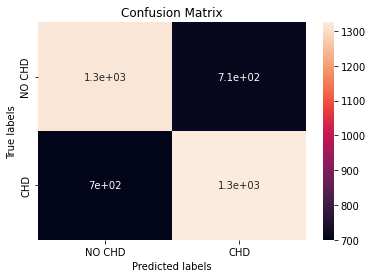

In [77]:
# Confusion_matrix of training data.

labels = ['NO CHD', 'CHD']
cm = confusion_matrix(y_train, y_train_lr_predict)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[323 183]
 [181 326]]


[Text(0, 0.5, 'NO CHD'), Text(0, 1.5, 'CHD')]

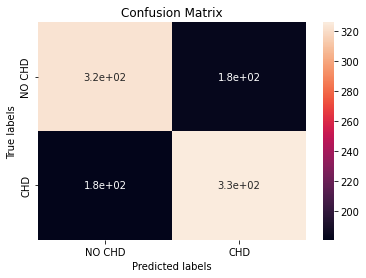

In [78]:
# Confusion_matrix of testing data.

labels = ['NO CHD', 'CHD']
cm = confusion_matrix(y_test, y_test_lr_predict)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

From the confusion matrix we can say that :

True positive(TP).: This shows that a model correctly predicted Positive cases as Positive.

False positive(FP): This shows that a model incorrectly predicted Negative cases as Positive.

False Negative:(FN) This shows that an incorrectly model predicted Positive cases as Negative.

True Negative(TN): This shows that a model correctly predicted Negative cases as Positive.

In [69]:
# Classification Report of training dataset.

print(classification_report(y_train,y_train_lr_predict))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      2026
           1       0.65      0.65      0.65      2025

    accuracy                           0.65      4051
   macro avg       0.65      0.65      0.65      4051
weighted avg       0.65      0.65      0.65      4051



In [74]:
# Classification Report of testing dataset.

print(classification_report(y_test,y_test_lr_predict))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       506
           1       0.64      0.64      0.64       507

    accuracy                           0.64      1013
   macro avg       0.64      0.64      0.64      1013
weighted avg       0.64      0.64      0.64      1013



**Precision:** It calculates the ratio of how well your model classified True positives from all the observations that were classified as 1.

**Recall:** It calculates the ratio of how well your model classified True positives from all the observations whose true value or actual value is 1.

**f1-score:** It is the harmonic mean of precision and recall.